# Polynomial Regression

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [3]:
dataset = pd.read_csv('Position_Salaries.csv')

dataset

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [4]:
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

## Training the linear regression on the whole dataset

In [5]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()

lin_reg.fit(X,y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Training the polynomial regression on the whole dataset

In [6]:
from sklearn.preprocessing import PolynomialFeatures

poly_reg = PolynomialFeatures(degree=2)

X_poly = poly_reg.fit_transform(X)

X_poly

array([[  1.,   1.,   1.],
       [  1.,   2.,   4.],
       [  1.,   3.,   9.],
       [  1.,   4.,  16.],
       [  1.,   5.,  25.],
       [  1.,   6.,  36.],
       [  1.,   7.,  49.],
       [  1.,   8.,  64.],
       [  1.,   9.,  81.],
       [  1.,  10., 100.]])

In [12]:
lin_reg2 = LinearRegression()

lin_reg2.fit(X_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [16]:
poly_reg1 = PolynomialFeatures(degree=4)

X_poly_2 = poly_reg1.fit_transform(X)


lin_reg3 = LinearRegression()

lin_reg3.fit(X_poly_2, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Visualize the Linear regression results


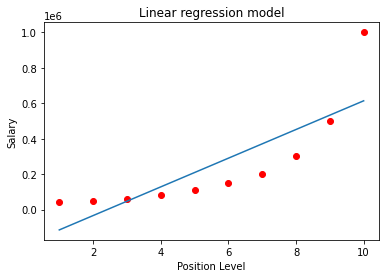

In [9]:
plt.scatter(X, y, color='red')
plt.plot(X, lin_reg.predict(X))
plt.title('Linear regression model')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

## Visualize the Polynomial regression (degree = 2)

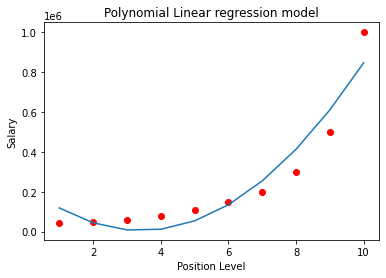

In [11]:
plt.scatter(X, y, color='red')
plt.plot(X, lin_reg2.predict(X_poly))
plt.title('Polynomial Linear regression model')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

## Visualize the Polynomial regression (degree = 4)




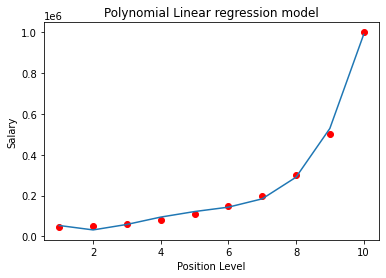

In [17]:
plt.scatter(X, y, color='red')
plt.plot(X, lin_reg3.predict(X_poly_2))
plt.title('Polynomial Linear regression model')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

## Visualizing higher resolution and smoother curve

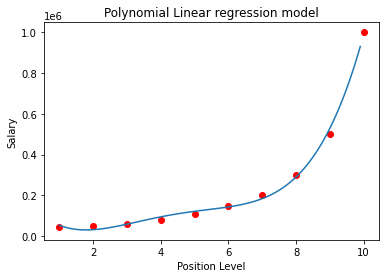

In [18]:
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape(len(X_grid),1)

plt.scatter(X, y, color='red')
plt.plot(X_grid, lin_reg3.predict(poly_reg1.fit_transform(X_grid)))
plt.title('Polynomial Linear regression model')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

## Predict a new result with Linear regression

In [24]:
y_pred = lin_reg.predict([[6.5]])

y_pred

array([330378.78787879])

## Predict a new result with Polynomial regression

In [25]:
y_pred1 = lin_reg2.predict(poly_reg.fit_transform([[6.5]]))

y_pred1

array([189498.10606061])

In [26]:
y_pred2 = lin_reg3.predict(poly_reg1.fit_transform([[6.5]]))

y_pred2

array([158862.45265155])